# Medical premiums prediction

Dataset from https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction

Analysis is based on this paper https://www.sciencedirect.com/science/article/pii/S2666827023000695#sec0011

## I. Data preprocessing 

### 1. Check the data for duplicates or missing values



In [1]:
# Initialize Code

import pandas as pd

import numpy as np

pd.option_context('mode.use_inf_as_na', True)

df = pd.read_csv('Medicalpremium.csv')

In [2]:
# First, check if the data contains duplicates

print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
981    False
982    False
983    False
984    False
985    False
Length: 986, dtype: bool


In [3]:
#Length of dataset compared to dataset without duplicates. If it is equal to zero, then there are no duplicates

len(df)-len(df.drop_duplicates())

0

In [4]:
# Next, check if the data contains missing values

print(df.isna())

       Age  Diabetes  BloodPressureProblems  AnyTransplants  \
0    False     False                  False           False   
1    False     False                  False           False   
2    False     False                  False           False   
3    False     False                  False           False   
4    False     False                  False           False   
..     ...       ...                    ...             ...   
981  False     False                  False           False   
982  False     False                  False           False   
983  False     False                  False           False   
984  False     False                  False           False   
985  False     False                  False           False   

     AnyChronicDiseases  Height  Weight  KnownAllergies  \
0                 False   False   False           False   
1                 False   False   False           False   
2                 False   False   False           False   
3      

In [5]:
#Length of dataset compared to dataset without duplicates. If it is equal to zero, then there are therefore no duplicates

len(df)-len(df.dropna())

0

### 2. Describe the data types

In [6]:
# Show the types of variables that we have on the dataset

df.dtypes

Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

### 3. Calculate a new parameter : BMI

In [8]:
# Create copy of the dataframe

df2 = df

# Calculate BMI then rearrange columns

df2['BMI'] = df2['Weight'] / (df2['Height']/100) ** 2 

df2 = df[['Age','Diabetes','BloodPressureProblems','AnyTransplants',
          'AnyChronicDiseases','Height','Weight', 'BMI', 'KnownAllergies',
          'HistoryOfCancerInFamily','NumberOfMajorSurgeries', 'PremiumPrice']]

df2

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,BMI,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,23.725286,0,0,0,25000
1,60,1,0,0,0,180,73,22.530864,0,0,0,29000
2,36,1,1,0,0,158,59,23.634033,0,0,1,23000
3,52,1,1,0,1,183,93,27.770313,0,0,2,28000
4,38,0,0,0,1,166,88,31.934969,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,23.458562,0,0,0,15000
982,64,1,1,0,0,153,70,29.903029,0,0,3,28000
983,56,0,1,0,0,155,71,29.552549,0,0,1,29000
984,47,1,1,0,0,158,73,29.242109,1,0,1,39000


### 4. Study the data and normalize it with the Standard Scalar technique

In [9]:
# Separate variables into two arrays, one for inputs and one for outputs

X = df2.drop('PremiumPrice', axis = 1)
Y = df2['PremiumPrice']

# Show X

X.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,BMI,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,23.725286,0,0,0
1,60,1,0,0,0,180,73,22.530864,0,0,0
2,36,1,1,0,0,158,59,23.634033,0,0,1
3,52,1,1,0,1,183,93,27.770313,0,0,2
4,38,0,0,0,1,166,88,31.934969,0,0,1


In [10]:
# Show Y

Y.head()

0    25000
1    29000
2    23000
3    28000
4    23000
Name: PremiumPrice, dtype: int64

In [11]:
#Describe Data

X.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,BMI,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,27.460709,0.215010,0.117647,0.667343
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,5.878671,0.411038,0.322353,0.749205
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,15.156281,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,23.393392,0.000000,0.000000,0.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,27.156602,0.000000,0.000000,1.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,30.759870,0.000000,0.000000,1.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,50.000000,1.000000,1.000000,3.000000


In [12]:
Y.describe()

count      986.000000
mean     24336.713996
std       6248.184382
min      15000.000000
25%      21000.000000
50%      23000.000000
75%      28000.000000
max      40000.000000
Name: PremiumPrice, dtype: float64

In [13]:
# Setting specific version of matplotlib for compatibility reasons

#!pip uninstall matplotlib
#!pip install matplotlib==3.7.3

In [14]:
# Import  libraries

from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Apply the standardized scaler to X and assign it to a new data frame

scaler = preprocessing.StandardScaler()
standard_X = scaler.fit_transform(X)
standard_X = pd.DataFrame(standard_X, columns=['Age','Diabetes','BloodPressureProblems','AnyTransplants',
                                            'AnyChronicDiseases','Height','Weight', 'BMI', 'KnownAllergies',
                                            'HistoryOfCancerInFamily','NumberOfMajorSurgeries'])

standard_X.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,BMI,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
count,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02
mean,1.945705e-16,9.368211e-17,5.404737e-18,5.044421e-17,4.954342e-18,4.900295e-16,-1.369200e-16,-4.792200e-16,-6.846000e-17,-3.603158e-17,1.801579e-17
std,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00
min,-1.701415e+00,-8.507504e-01,-9.389778e-01,-2.430561e-01,-4.693581e-01,-2.296887e+00,-1.820070e+00,-2.094125e+00,-5.233563e-01,-3.651484e-01,-8.911867e-01
25%,-8.415874e-01,-8.507504e-01,-9.389778e-01,-2.430561e-01,-4.693581e-01,-7.116350e-01,-6.978820e-01,-6.922279e-01,-5.233563e-01,-3.651484e-01,-8.911867e-01
50%,1.824009e-02,-8.507504e-01,-9.389778e-01,-2.430561e-01,-4.693581e-01,-1.808731e-02,-1.367880e-01,-5.175670e-02,-5.233563e-01,-3.651484e-01,4.442389e-01
75%,8.064152e-01,1.175433e+00,1.064988e+00,-2.430561e-01,-4.693581e-01,7.745387e-01,7.048530e-01,5.614935e-01,-5.233563e-01,-3.651484e-01,4.442389e-01
max,1.737895e+00,1.175433e+00,1.064988e+00,4.114277e+00,2.130569e+00,1.963478e+00,3.861007e+00,3.836025e+00,1.910744e+00,2.738613e+00,3.115090e+00


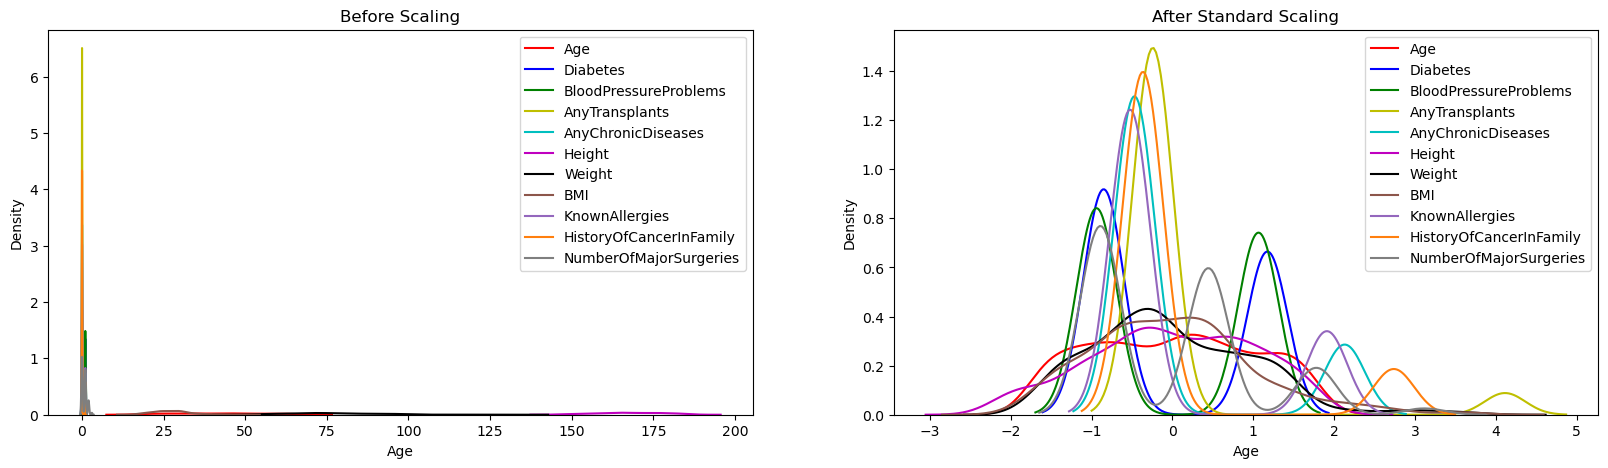

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(20, 5))

ax1.set_title('Before Scaling')
 
sns.kdeplot(X['Age'], ax = ax1, color ='r', label='Age')
sns.kdeplot(X['Diabetes'], ax = ax1, color ='b', label='Diabetes')
sns.kdeplot(X['BloodPressureProblems'], ax = ax1, color ='g', label='BloodPressureProblems')
sns.kdeplot(X['AnyTransplants'], ax = ax1, color ='y', label='AnyTransplants')
sns.kdeplot(X['AnyChronicDiseases'], ax = ax1, color ='c', label='AnyChronicDiseases')
sns.kdeplot(X['Height'], ax = ax1, color ='m', label='Height')
sns.kdeplot(X['Weight'], ax = ax1, color ='k', label='Weight')
sns.kdeplot(X['BMI'], ax = ax1, color ='tab:brown', label='BMI')
sns.kdeplot(X['KnownAllergies'], ax = ax1, color ='tab:purple', label='KnownAllergies')
sns.kdeplot(X['HistoryOfCancerInFamily'], ax = ax1, color ='tab:orange', label='HistoryOfCancerInFamily')
sns.kdeplot(X['NumberOfMajorSurgeries'], ax = ax1, color ='tab:gray', label='NumberOfMajorSurgeries')

ax1.legend()

ax2.set_title('After Standard Scaling')
 
sns.kdeplot(standard_X['Age'], ax = ax2, color ='r', label='Age')
sns.kdeplot(standard_X['Diabetes'], ax = ax2, color ='b', label='Diabetes')
sns.kdeplot(standard_X['BloodPressureProblems'], ax = ax2, color ='g', label='BloodPressureProblems')
sns.kdeplot(standard_X['AnyTransplants'], ax = ax2, color ='y', label='AnyTransplants')
sns.kdeplot(standard_X['AnyChronicDiseases'], ax = ax2, color ='c', label='AnyChronicDiseases')
sns.kdeplot(standard_X['Height'], ax = ax2, color ='m', label='Height')
sns.kdeplot(standard_X['Weight'], ax = ax2, color ='k', label='Weight')
sns.kdeplot(standard_X['BMI'], ax = ax2, color ='tab:brown', label='BMI')
sns.kdeplot(standard_X['KnownAllergies'], ax = ax2, color ='tab:purple', label='KnownAllergies')
sns.kdeplot(standard_X['HistoryOfCancerInFamily'], ax = ax2, color ='tab:orange', label='HistoryOfCancerInFamily')
sns.kdeplot(standard_X['NumberOfMajorSurgeries'], ax = ax2, color ='tab:gray', label='NumberOfMajorSurgeries')

ax2.legend()

plt.show()

## II. Exploratory data analysis

### Examining correlation between variables

In [16]:
# Show correlation matrix for our dataframe

df2.corr()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,BMI,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,1.000000,0.210908,0.244888,-0.008549,0.051072,0.039879,-0.018590,-0.042027,-0.024416,-0.027623,0.429181,0.697540
Diabetes,0.210908,1.000000,0.127727,-0.036652,-0.089428,-0.003783,-0.024563,-0.022913,-0.080102,-0.055527,0.122722,0.076209
BloodPressureProblems,0.244888,0.127727,1.000000,-0.024538,0.045424,-0.037926,-0.061016,-0.038028,-0.011550,0.048239,0.251568,0.167097
AnyTransplants,-0.008549,-0.036652,-0.024538,1.000000,0.035285,-0.031543,0.002087,0.023508,0.001876,-0.020171,-0.004154,0.289056
AnyChronicDiseases,0.051072,-0.089428,0.045424,0.035285,1.000000,0.047419,-0.033318,-0.056980,-0.027418,0.008666,0.014835,0.208610
Height,0.039879,-0.003783,-0.037926,-0.031543,0.047419,1.000000,0.066946,-0.504947,-0.010200,0.010549,0.037289,0.026910
Weight,-0.018590,-0.024563,-0.061016,0.002087,-0.033318,0.066946,1.000000,0.820679,0.037492,0.003481,-0.006108,0.141507
BMI,-0.042027,-0.022913,-0.038028,0.023508,-0.056980,-0.504947,0.820679,1.000000,0.040437,0.002390,-0.027225,0.103812
KnownAllergies,-0.024416,-0.080102,-0.011550,0.001876,-0.027418,-0.010200,0.037492,0.040437,1.000000,0.115383,0.103923,0.012103
HistoryOfCancerInFamily,-0.027623,-0.055527,0.048239,-0.020171,0.008666,0.010549,0.003481,0.002390,0.115383,1.000000,0.212657,0.083139


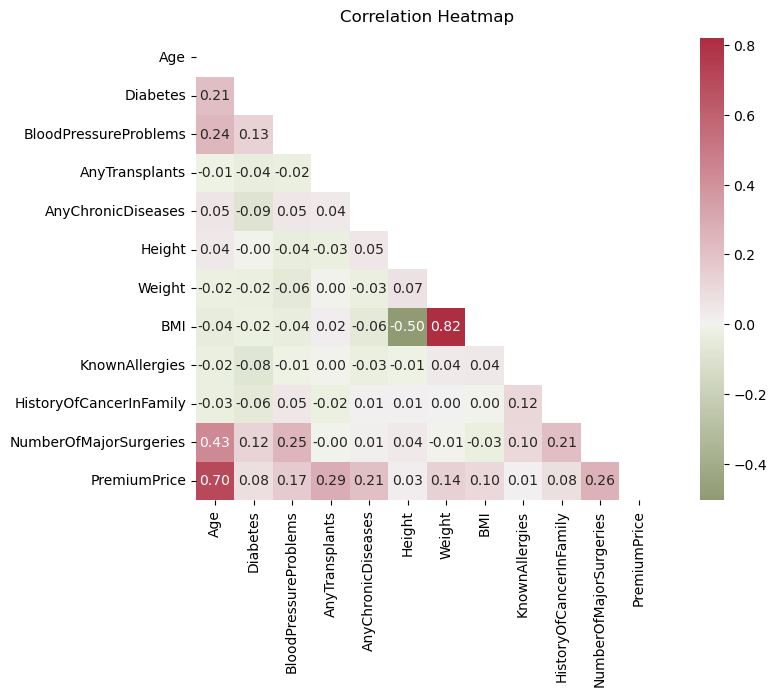

In [35]:
# Create correlation variable

plt.figure(figsize=(11, 6))

corr =  df2.corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

# Draw heatmap

heatmap = sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

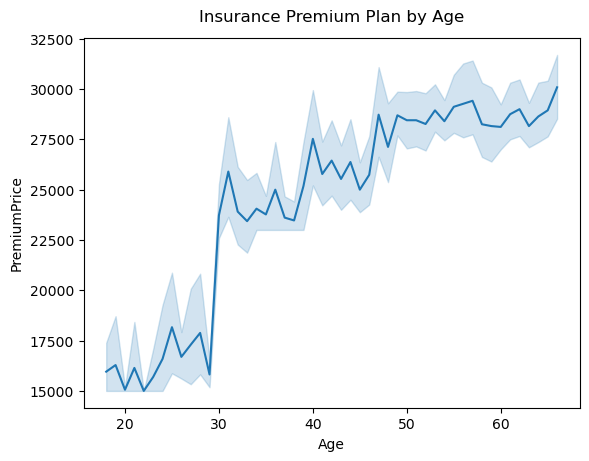

In [40]:
# Graph relationship between age and premium

lineplot = sns.lineplot(data=df2, x=df2['Age'], y=df2['PremiumPrice'])

lineplot.set_title('Insurance Premium Plan by Age', fontdict={'fontsize':12}, pad=12);

## III. Machine Learning Models

### 1. Random Forest

In [5]:
# Modelling

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

ModuleNotFoundError: No module named 'graphviz'